# Initial Set up

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
LABELED_PATH = "../data/processed/wintermute_transfers_clean_defi.parquet"  # adjust if you used .csv
df_defi = pd.read_parquet(LABELED_PATH)
display(df_defi.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365667 entries, 0 to 365666
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   timestamp     365667 non-null  object 
 1   from_address  365667 non-null  object 
 2   from_entity   365667 non-null  object 
 3   to_address    365667 non-null  object 
 4   to_entity     365667 non-null  object 
 5   token         365667 non-null  object 
 6   value         365667 non-null  float64
 7   usd           365667 non-null  float64
 8   tx_hash       365667 non-null  object 
 9   chain         365667 non-null  object 
 10  block_number  365667 non-null  float64
dtypes: float64(3), object(8)
memory usage: 30.7+ MB


None

In [131]:
df_defi_from = df_defi[df_defi['from_entity']!='Wintermute']
df_defi_from = df_defi_from.rename(columns={"from_address": "address", "from_entity": "entity"})

df_defi_to = df_defi[df_defi['to_entity']!='Wintermute']
df_defi_to = df_defi_to.rename(columns={"to_address": "address", "to_entity": "entity"})

df_defi_non_wintermute = (
    pd.concat([df_defi_from, df_defi_to], ignore_index=True)
      .drop(columns=['from_address','from_entity',
                    'to_address','to_entity'])
      .reset_index(drop=True)
      .sort_values('entity')
)
display(df_defi_non_wintermute.info())

<class 'pandas.core.frame.DataFrame'>
Index: 365667 entries, 9063 to 348825
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   timestamp     365667 non-null  object 
 1   address       365667 non-null  object 
 2   entity        365667 non-null  object 
 3   token         365667 non-null  object 
 4   value         365667 non-null  float64
 5   usd           365667 non-null  float64
 6   tx_hash       365667 non-null  object 
 7   chain         365667 non-null  object 
 8   block_number  365667 non-null  float64
dtypes: float64(3), object(6)
memory usage: 27.9+ MB


None

In [132]:
df_defi['timestamp'] = pd.to_datetime(df_defi["timestamp"],  utc=True, errors="coerce")
df_defi = df_defi.set_index("timestamp").sort_index()

df_defi_non_wintermute['timestamp'] = pd.to_datetime(df_defi_non_wintermute["timestamp"],  utc=True, errors="coerce")
df_defi_non_wintermute = df_defi_non_wintermute.set_index("timestamp").sort_index()

# Overall Core Performance Metrics

In [133]:
df_defi_to['usd'] *= -1
df_defi_fromto = (
    pd.concat([df_defi_from.rename(columns={"usd":"net_usd"}), df_defi_to.rename(columns={"usd":"net_usd"})], ignore_index=True)
      .reset_index(drop=True)
      .sort_values('timestamp')
      .set_index('timestamp', drop=False)
)
df_defi_fromto.index = pd.to_datetime(df_defi_fromto.index, utc=True)
df_defi_to['usd'] *= -1 # convert back again to original values

df_defi_fromto.head()

,timestamp,address,entity,to_address,to_entity,token,value,net_usd,tx_hash,chain,block_number,from_address,from_entity
timestamp,,,,,,,,,,,,,
2025-04-08 01:30:11+00:00,2025-04-08 01:30:11+00:00,0x7fcdc35463e3770c2fb992716cd070b63540b947,PancakeSwap,NaN,NaN,WETH,0.132825,-206.039373,0x2df77ad6d13e9d4cbf89b46a4e19c69eb02106a7b00b...,arbitrum_one,324056309.0,0x51c72848c68a965f66fa7a88855f9f7784502a7f,Wintermute
2025-04-08 01:30:11+00:00,2025-04-08 01:30:11+00:00,0x478946bcd4a5a22b316470f5486fafb928c0ba25,Velodrome Finance,0x51c72848c68a965f66fa7a88855f9f7784502a7f,Wintermute,USDC,2763.916721,2763.916721,0x372cd43e7eb18daa53e73d2a059c0dee68eeb53b0b67...,optimism,134238517.0,NaN,NaN
2025-04-08 01:30:11+00:00,2025-04-08 01:30:11+00:00,0x11b815efb8f581194ae79006d24e0d814b7697f6,Uniswap,0x51c72848c68a965f66fa7a88855f9f7784502a7f,Wintermute,USDT,60431.832928,60431.832928,0x419e8487dd47a21312b9dcf18edec63da3c6ec9745f9...,ethereum,22220904.0,NaN,NaN
2025-04-08 01:30:11+00:00,2025-04-08 01:30:11+00:00,0xc6f780497a95e246eb9449f5e4770916dcd6396a,Uniswap,0x51c72848c68a965f66fa7a88855f9f7784502a7f,Wintermute,ARB,4866.641421,1329.619969,0x0a5a54bca3a858a0597e72e5378ecc2a1d3ac5c3bd4d...,arbitrum_one,324056309.0,NaN,NaN
2025-04-08 01:30:11+00:00,2025-04-08 01:30:11+00:00,0x7fcdc35463e3770c2fb992716cd070b63540b947,PancakeSwap,0x51c72848c68a965f66fa7a88855f9f7784502a7f,Wintermute,USDC,207.847462,207.847462,0x2df77ad6d13e9d4cbf89b46a4e19c69eb02106a7b00b...,arbitrum_one,324056309.0,NaN,NaN


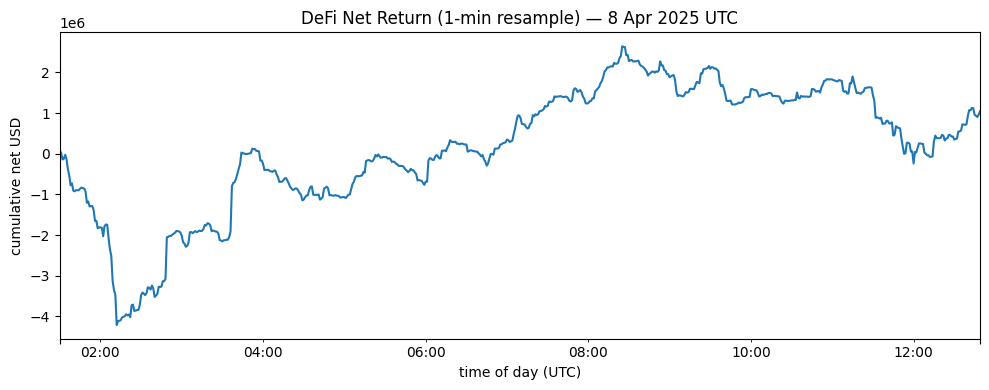

In [134]:
pnl_per_min = (df_defi_fromto
               ["net_usd"]                      
               .resample("1min")                
               .sum()                           
              )

pnl_per_min.cumsum().plot(figsize=(10,4))
plt.title("DeFi Net Return (1-min resample) — 8 Apr 2025 UTC")
plt.ylabel("cumulative net USD")
plt.xlabel("time of day (UTC)")
plt.tight_layout()
plt.show()

# Simple Swaps

In [135]:
df_defi_out = df_defi_to.rename(columns={'token':'token_out','value':'value_out','usd':'usd_out'})
df_defi_in = df_defi_from.rename(columns={'token':'token_in','value':'value_in','usd':'usd_in'})
df_defi_swaps = (
    df_defi_in
    .merge(df_defi_out,on=('tx_hash','timestamp'),suffixes=('_in','_out'))
    .sort_values('timestamp')
    .set_index('timestamp', drop=False)
)

df_defi_swaps.index = pd.to_datetime(df_defi_swaps.index, utc=True)

df_defi_swaps["pair"] = df_defi_swaps.apply(
    lambda r: "/".join(sorted([r["token_out"], r["token_in"]])),
    axis=1
)

df_defi_swaps['tx_vol_usd'] = df_defi_swaps['usd_in'] + df_defi_swaps['usd_out']
df_defi_swaps['net_usd'] = df_defi_swaps['usd_in'] - df_defi_swaps['usd_out']

df_defi_swaps.head()

,timestamp,address_in,entity_in,to_address,to_entity,token_in,value_in,usd_in,tx_hash,chain_in,...,address_out,entity_out,token_out,value_out,usd_out,chain_out,block_number_out,pair,tx_vol_usd,net_usd
timestamp,,,,,,,,,,,,,,,,,,,,,
2025-04-08 01:30:11+00:00,2025-04-08 01:30:11+00:00,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,Uniswap,0x51c72848c68a965f66fa7a88855f9f7784502a7f,Wintermute,USDC,41275.972918,41275.972918,0x508676cc2178573aed6f5c20e36ec470b66c4d03d1f5...,ethereum,...,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,Uniswap,WETH,26.369902,40904.991790,ethereum,22220904.0,USDC/WETH,82180.964708,370.981128
2025-04-08 01:30:11+00:00,2025-04-08 01:30:11+00:00,5xxtgxq5jhb3grdgtgq4yt7ymjbqbxdffhnkz8vc6xlb,Orca,g76njjakelhfr7oarkod3vogpr4y4hmlgnqd2egpcn8n,Wintermute,WBTC,0.006465,510.109014,zayyubvfdusukemdoxjijiv2czxzecefcxomfrrldbjqcb...,solana,...,5qk7fzuy9syi2ohbdhxvmpulnaxcvkjmck1g1c1dq9nk,Orca,WSOL,4.714860,507.507485,solana,332006925.0,WBTC/WSOL,1017.616499,2.601529
2025-04-08 01:30:11+00:00,2025-04-08 01:30:11+00:00,0xe0554a476a092703abdb3ef35c80e0d76d32939f,Uniswap,0x51c72848c68a965f66fa7a88855f9f7784502a7f,Wintermute,USDC,2828.037262,2828.037262,0x2a99565e3f992c5b4800f8e07972339ef0543b02af24...,ethereum,...,0xe0554a476a092703abdb3ef35c80e0d76d32939f,Uniswap,WETH,1.806479,2802.209679,ethereum,22220904.0,USDC/WETH,5630.246941,25.827583
2025-04-08 01:30:11+00:00,2025-04-08 01:30:11+00:00,0x6ca298d2983ab03aa1da7679389d955a4efee15c,PancakeSwap,0x51c72848c68a965f66fa7a88855f9f7784502a7f,Wintermute,USDT,2944.683176,2944.683176,0x8cad0cf805bc6b50dbe4f35cf23cd13134c964aacd3f...,ethereum,...,0x6ca298d2983ab03aa1da7679389d955a4efee15c,PancakeSwap,WETH,1.880444,2916.944067,ethereum,22220904.0,USDT/WETH,5861.627243,27.739109
2025-04-08 01:30:11+00:00,2025-04-08 01:30:11+00:00,0x478946bcd4a5a22b316470f5486fafb928c0ba25,Velodrome Finance,0x51c72848c68a965f66fa7a88855f9f7784502a7f,Wintermute,USDC,2763.916721,2763.916721,0x372cd43e7eb18daa53e73d2a059c0dee68eeb53b0b67...,optimism,...,0x478946bcd4a5a22b316470f5486fafb928c0ba25,Velodrome Finance,WETH,1.765473,2746.121974,optimism,134238517.0,USDC/WETH,5510.038695,17.794747


In [138]:
df_defi_swaps_pair = df_defi_swaps.groupby("pair").agg(
    trades = ('tx_hash','nunique'),
    total_volume_usd = ('tx_vol_usd','sum'),
    net_buy_usd = ('usd_in','sum'),
    net_sell_usd = ('usd_out','sum')
).sort_values('total_volume_usd',ascending=False)

df_defi_swaps_pair['net_flow_usd'] = df_defi_swaps_pair['net_buy_usd'] - df_defi_swaps_pair['net_sell_usd']

print("Top 5 token pairs that had largest total volume (USD)")
display(df_defi_swaps_pair.head(5))
print("Top 5 token pairs that have positive return")
display(df_defi_swaps_pair.sort_values(by='net_flow_usd',ascending=False).head(5))
print("Top 5 token pairs that have negative return")
display(df_defi_swaps_pair.sort_values(by='net_flow_usd',ascending=True).head(5))
display(f"net_flow_usd from simple swaps: {df_defi_swaps_pair['net_flow_usd'].sum()}")

Top 5 token pairs that had largest total volume (USD)


,trades,total_volume_usd,net_buy_usd,net_sell_usd,net_flow_usd
pair,,,,,
USDC/WETH,21815,1.635062e+08,8.174252e+07,8.176363e+07,-2.110784e+04
USDC/WSOL,53213,9.592461e+07,4.793667e+07,4.798794e+07,-5.127555e+04
USDC/cbBTC,6026,6.731235e+07,3.332859e+07,3.398376e+07,-6.551669e+05
ETH/WETH,996,6.688068e+07,6.687328e+07,7.400490e+03,6.686588e+07
USDT/WETH,4858,4.317092e+07,2.187182e+07,2.129910e+07,5.727197e+05


Top 5 token pairs that have positive return


,trades,total_volume_usd,net_buy_usd,net_sell_usd,net_flow_usd
pair,,,,,
ETH/WETH,996,6.688068e+07,6.687328e+07,7400.489769,6.686588e+07
ETH/USDC,278,2.979304e+07,2.979047e+07,2571.758235,2.978789e+07
SOL/WSOL,20106,1.939014e+07,1.938833e+07,1807.168222,1.938652e+07
SOL/USDC,15608,1.364831e+07,1.364002e+07,8291.724674,1.363173e+07
ETH/WBTC,233,5.277365e+06,5.274116e+06,3248.606810,5.270867e+06


Top 5 token pairs that have negative return


,trades,total_volume_usd,net_buy_usd,net_sell_usd,net_flow_usd
pair,,,,,
USDC/cbBTC,6026,6.731235e+07,3.332859e+07,3.398376e+07,-655166.923798
USDC/USDC,35,1.112801e+06,3.758046e+05,7.369968e+05,-361192.253557
WETH/WETH,23,5.012262e+05,9.259606e+04,4.086301e+05,-316034.057981
APU/stETH,1,2.495852e+05,3.119203e+02,2.492733e+05,-248961.346308
EIGEN/USDC,7,3.681158e+05,7.981986e+04,2.882959e+05,-208476.036350


'net_flow_usd from simple swaps: 157332920.68437576'

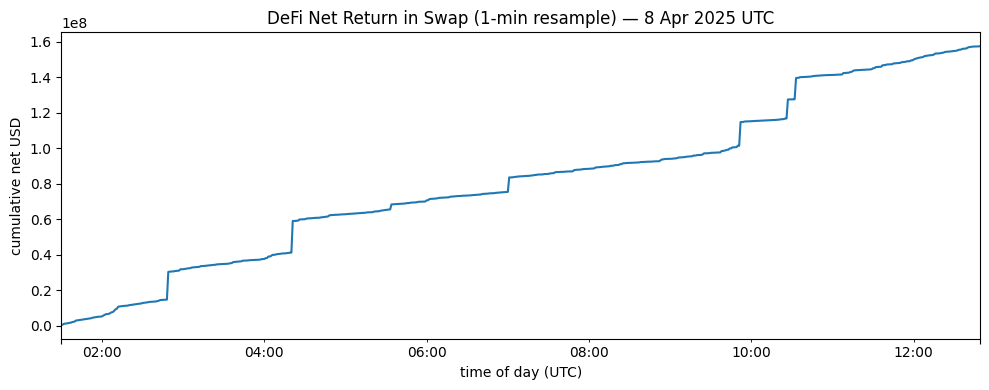

In [137]:
pnl_swap_per_min = (df_defi_swaps
               ["net_usd"]                      # the P&L leg
               .resample("1min")                # 1-minute frequency (“T” = minute)
               .sum()                           # sum of all swaps in that minute
              )

pnl_swap_per_min.cumsum().plot(figsize=(10,4))
plt.title("DeFi Net Return in Swap (1-min resample) — 8 Apr 2025 UTC")
plt.ylabel("cumulative net USD")
plt.xlabel("time of day (UTC)")
plt.tight_layout()
plt.show()